# Приоритизация гипотез и анализ А/В-теста

# Введение

В данном исследовании мы приоритизируем гипотезы для увеличения выручки и проведем анализ А/В-теста \
\
**Целью** данного проекта является: \
В **первой** части проекта - нахождение самой приоритетной гипотезы с помощью методов приоритизации ICE и RICE \
Во **второй** части проекта - подвести результаты А/В-теста и дать окончательную оценку его успешности \
\
В первой части проекта мы располагаем таблицей, содержащей 10 гипотез, и данными о каждой гипотезе, отражающими Охват пользователей (Reach), Воздействие (Impact), Уверенность в результате (Confidence) и Затратах (Efforts), выраженными в значениях по шкале от 1 до 10 \
Во второй части проекта в нашем распоряжении данные о посетителях и заказах двух наблюдаемых групп (А и В) \
\
**План работы:** \
В первой части проекта мы приоритезируем гипотезы с помощью двух методов: ICE и RICE\
Во второй части проекта мы:
1) Построим графики кумулятивной выручки, среднего чека и среднего количества заказов на посетителя (конверсии) \
2) Построим графики относительного изменения кумулятивного среднего чека и конверсии группы В к группе А \
3) Построим точечные графики количества заказов по пользователям и суммы заказов, а также определим границы аномальных значений \
4) Избавимся от аномальных значений \
5) Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "сырым" и "очищенным" данным \
6) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" и "очищенным" данным

# Часть 1. Приоритизация гипотез.

## Знакомство с данными

In [252]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [253]:
pd.options.display.max_colwidth = 130
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Метод приоритизации ICE

In [254]:
data['ICE'] = ((data['Impact'] * data['Confidence']) / data['Efforts']).round(2)
pd.options.display.max_colwidth = 130
data.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


## Метод приоритизации RICE

In [255]:
data['RICE'] = ((data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']).round(2)
pd.options.display.max_colwidth = 130
data.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


При использовании метода приоритизации RICE практически все гипотезы поменяли свое положение по сравнению с методом ICE. Все дело в том, что метод RICE добавляет переменную, отображающую охват пользователей, которых затронет данное изменение. Таким образом, например, гипотеза о запуске акции (под номером 8), которая находилась на вершине списка по методу приоритизации ICE из-за высокого влияния и высокой уверенности при средних затратах, опустилась на пятую позицию по методу RICE, поскольку охват пользователей, которых затронет данное нововведение, был оценен в 1 балл.

# Часть 2. Анализ A/B-теста

In [256]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [257]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [258]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group'] # переименовываем столбцы в принятый формат

In [259]:
orders.duplicated().sum() # проверяем на наличие дубликатов

0

In [260]:
orders['date'] = pd.to_datetime(orders['date'], format= '%Y-%m-%d') # приводим к формату время

In [261]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [262]:
visitors['date'] = pd.to_datetime(visitors['date'], format= '%Y-%m-%d')

In [263]:
print(orders['group'].unique()) # Проверяем количество групп в А/В-тесте
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


В тесте принимают участие всего две группы

In [264]:
print(orders['date'].min()) # Изучаем временной интервал теста
print(orders['date'].max())
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00


Временные рамки исследования - ровно месяц (август 2019 года)

In [265]:
print(orders.groupby('group')['visitor_id'].count())
print(visitors.groupby('group')['visitors'].sum())

group
A    557
B    640
Name: visitor_id, dtype: int64
group
A    18736
B    18916
Name: visitors, dtype: int64


Количество посетителей в двух группах приблизительно одинаковое, однако уже на лицо более высокая конверсия в группе В. Изучим это подробнее в основной части исследования

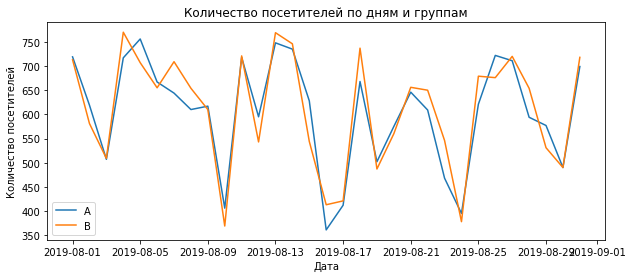

In [266]:
plt.figure(figsize=(10, 4))
plt.plot(visitors.query('group == "A"')['date'], visitors.query('group == "A"')['visitors'], label='A')
plt.plot(visitors.query('group == "B"')['date'], visitors.query('group == "B"')['visitors'], label='B')
plt.legend()
plt.title('Количество посетителей по дням и группам')
plt.ylabel('Количество посетителей')
plt.xlabel('Дата');

Посетители в двух группах распределены по дням схожим образом, а их количесво зависит от дня недели

## График кумулятивной выручки по группам.

In [267]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                   orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
                    'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                     visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                     axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


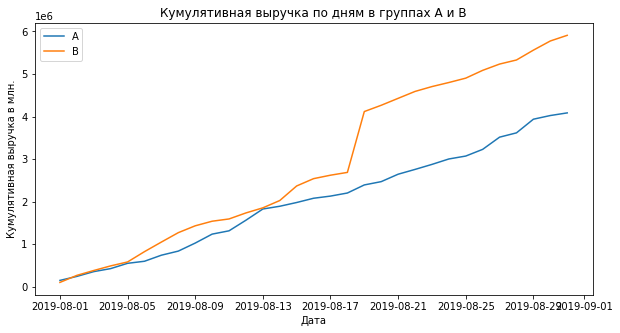

In [268]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.ylabel('Кумулятивная выручка в млн.')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по дням в группах А и В')
plt.show()

На графике мы видим, что группа В показывает более хорошие результаты, однако резкий скачок 19-го августа заставляет нас задуматься над репрезентативностью данного графика, поскольку на него, скорее всего, повлиял резкий выброс - один или несколько крупных заказов, либо резкий всплеск количества заказов.

## График кумулятивного среднего чека по группам.

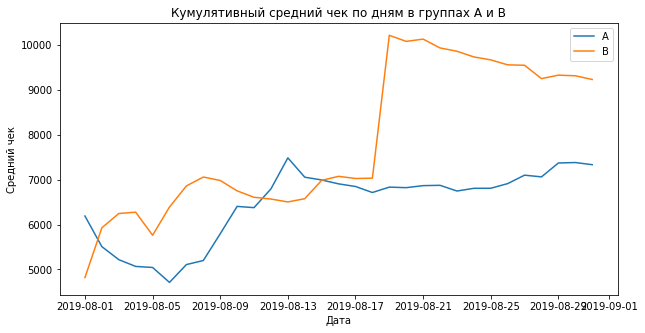

In [269]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек по дням в группах А и В')
plt.show()

Наше предположение о влиянии внезапных крупных заказов 19-го августа на группу В подтвердился, наблюдается резкий скачок с 7000 до 10000, что явственно демонстрирует нам, что на кумулятивную выручку и средний чек повлиял непредсказуемый выброс. \
В первую половину месяца средний чек меняется скачкообразно, а группы А и В приодически перехватывают лидерство друг у друга. Ситуация должна стабилизироваться к концу месяца, но тот самый выброс в граппе В не позволяет нам на данный момент сделать какой-либо корректный вывод.

## График относительного изменения кумулятивного среднего чека группы B к группе A. 

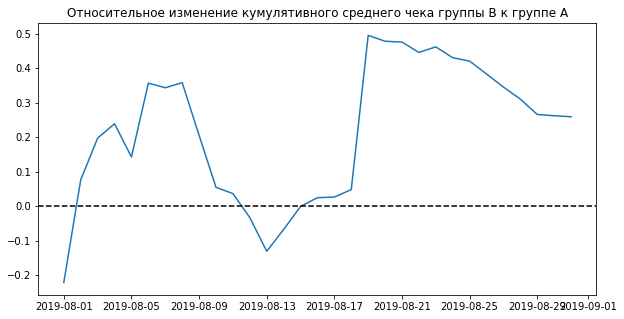

In [270]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А');

В целом группа В показывает более хорошие результаты по сравнению с группой А, однако, как говорилось выше, скачкообразный характер графика не позволяет нам в полной мере доверять ему

## График кумулятивного среднего количества заказов на посетителя по группам.

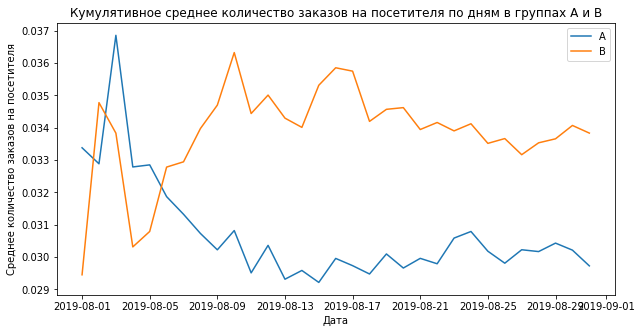

In [271]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeVisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeVisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.figure(figsize=(10, 5))
plt.plot(cumulativeVisitorsA['date'], cumulativeVisitorsA['orders']/cumulativeVisitorsA['visitors'], label='A')
plt.plot(cumulativeVisitorsB['date'], cumulativeVisitorsB['orders']/cumulativeVisitorsB['visitors'], label='B')
plt.legend()
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('Кумулятивное среднее количество заказов на посетителя по дням в группах А и В')
plt.show()

Кумулятивное среднее количество заказов на посетителя (что, по сути, является конверсией), в группе В существенно и стабильно выше, чем в группе А. Хоть в абсолютных значениях разница невелика (3,4 % в группе В против 3 % в группе А), но по отношению друг к другу группа В лидирует. Причем резских скачков в районе 19-го августа не наблюдается, что убеждает нас в мысли, что всплеск выручки и среднего чека заключался именно в нескольких аномально крупных заказах, а не в резком увеличении их количества

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

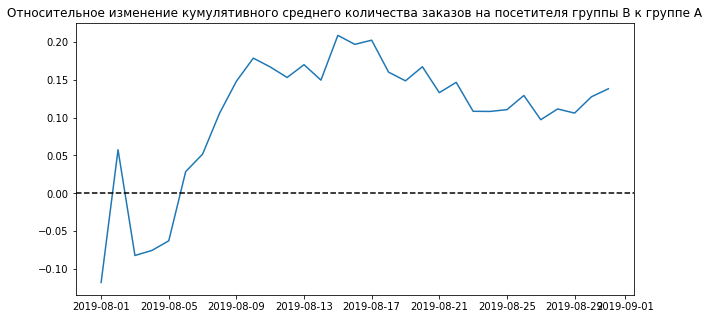

In [272]:
# собираем данные в одном датафрейме
mergedCumulativeVisitors = cumulativeVisitorsA.merge(cumulativeVisitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeVisitors['date'], (mergedCumulativeVisitors['ordersB']/mergedCumulativeVisitors['visitorsB'])/(mergedCumulativeVisitors['ordersA']/mergedCumulativeVisitors['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А');

Как и обозначалось выше, кумулятивное среднее количество заказов на посетителя (кумулятивная конверсия) группы В выше в среднем на 15%

## Точечный график количества заказов по пользователям.

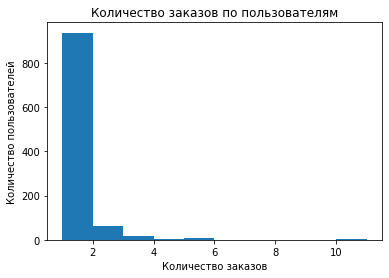

In [273]:
orders_per_visitor = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

plt.hist(orders_per_visitor['transaction_id']) 
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов');

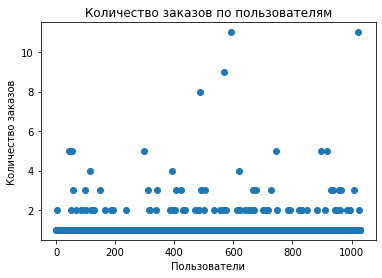

In [274]:
x_values = pd.Series(range(len(orders_per_visitor)))
plt.scatter(x_values, orders_per_visitor['transaction_id']) 
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи');

Как мы видим, у подавляющего количества пользователей по одному заказу, реже 2-3. Пользователи, у которых больше трех заказов - практически единичные случаи

## 95-й и 99-й перцентили количества заказов на пользователя.

In [275]:
print(np.percentile(orders_per_visitor['transaction_id'], [95, 99])) 

[2. 4.]


Не более 5% пользователей имеют больше 2 заказов, и не более 1% пользователей имеют больше 4 заказов. \
Мы выберем границу аномальных пользователей 95-го перцентиля, поскольку доля пользователей с 3 и более заказами составляет менее 5%. Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок. 

## Точечный график стоимостей заказов.

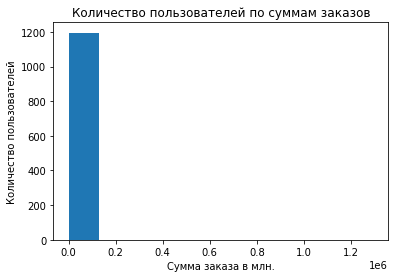

In [276]:
plt.hist(orders['revenue'])
plt.title('Количество пользователей по суммам заказов')
plt.ylabel('Количество пользователей')
plt.xlabel('Сумма заказа в млн.');

Даже по предварительной гистограмме видим, что как минимум один заказ на сумму свыше миллиона рублей смещает график и не дает увидеть его в полной мере. Рассмотрим точечный график стоимостей заказов.

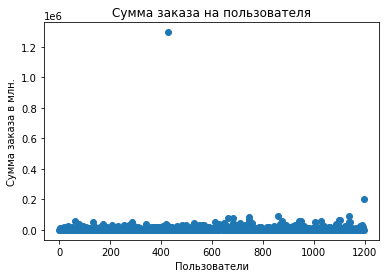

In [277]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Сумма заказа на пользователя')
plt.ylabel('Сумма заказа в млн.')
plt.xlabel('Пользователи');

Как и говорилось выше, аномальный заказ более чем на 1,2 млн сместил график. Однако даже так мы видим, что подавляющее большинство заказов - на сумму до 100 тысяч, есть один выброс около 200 тысяч и уже упомянутый выброс на 1,2 миллиона. Скорее всего, это и есть тот самый всплеск, который мы наблюдали в группе В 19-го августа, сместивший линию кумулятивной выручки и среднего чека

## 95-й и 99-й перцентили стоимости заказов.

In [278]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов были на сумму свыше 28 тысяч и не более 1% заказов были на сумму свыше 58 233. \
В качестве границы для определения аномальных казаов возьмем 99-й перцентиль, поскольку на качество данных в большей степени влияют всего два крупных выброса, заметных на графике, и они уберутся даже при такой границе. Заказы на 58 тысяч вряд ли можно считать выбросами по отношению к заказам на 28 тысяч, поэтому такая граница аномалий нам подходит

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы. \
**Нулевая:** различий в среднем количестве заказов между группами нет. \
**Альтернативная:** различия в среднем между группами есть

In [279]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [280]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [281]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [282]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Разница в средних:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Разница в средних: 0.138


По "сырым" данным p-value меньше 0,05, что вынуждает нас отвергуть нулевую гипотезу об отсутствии статистически значимых отличий. Относительный "выигрыш" группы В составляет 13,8% по сравнению с группой А

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Нулевая гипотеза:** различий в среднем чеке между группами нет. \
**Альтернативная гипотеза:** различия в среднем чеке между группами есть. 

In [283]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница в средних:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Разница в средних: 0.259


По "сырым" данным p-value больше 0,05, поэтому нет оснований отвергать нулевую гипотезу об отсутствии различий в среднем чеке между группами. Однако, относительный выиграш группы В по сравнению с группой А составляет 25,9%. Вероятно, здесь мы и обнаруживаем влияние того самого одного аномального заказа на 1,2 млн.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [284]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orders_per_visitor['transaction_id'], [95])[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orders_per_visitor['transaction_id'], [95])[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [99])[0]]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
31


В "очищенных" данных мы избавились от 31 аномального пользователя

In [285]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [286]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница в средних:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.010
Разница в средних: 0.174


По "очищенным" данным результаты изменились не сильно. p-value по-прежнему меньше 0.05, даже немного снизился по сравнению с "сырыми" данными. Нулевую гипотезу об отсуствии различий в среднем количестве заказов на пользователя между группами отвергаем. Относительный "выиграш" группы В составляет 17,4% по отношению к группе А (13,8% по сырым данным)

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [287]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Разница в средних:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.798
Разница в средних: -0.020


После удаления аномальных заказов, мы можем сделать вывод, что значимые различия в среднем чеке между двумя группами отсутствуют. p-value немного увеличился, а вот разница между двумя группами практически равна нулю (Группа В даже на 2% уступает группе А)

# Вывод

В данном исследовании мы анализировали результаты А/В теста и зафиксировали несколько фактов: 
1) Между группами наблюдается различие в конверсии. Группа В показывает положительную разницу по сравнению с группой А в 17,4% \
2) По среднему чеку различия между группами практически полностью отсуствуют. Первоначально на различия в среднем чеке сильно влиял аномальный заказ на 1,2 млн. \
3) График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A. После очистки данных от выбросов конечный показатель относительного изменения достиг 17,4% \
4) По графику относительного изменения кумулятивного среднего чека группы В к группе А нельзя сделать корректный вывод, однако именно он помог нам обнаружить главную аномалию в данных - резкий всплеск 21-го августа, именно тогда произошел заказ на 1,2 млн в группе В. В конечном счете, как уже упоминалось, после очистки данных различий в среднем чеке между группами не оказалось.

***Исходя из вышесказанного, тест можно остановить и признать успешным, закрепив лидерство за группой В. Она показала значительно более высокие показатели конверсии по сравнению с группой А при одинаковом уровне среднего чека***